In [1]:
import pandas as pd
import numpy as np
import csv 

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

C:\Users\danie\AppData\Local\Temp\ipykernel_11504\3462665596.py:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [3]:
# Astma XLSX to csv
astma ='asthma_CF_share.xlsx'
astmaXLSX = pd.read_excel(astma)
astmaXLSX.to_csv('astma.csv', index = None, header=True)

# Read csv
astma_df = pd.read_csv('astma.csv')

In [4]:
# Define cols
colnames = ["Index","SubjectNr","DayNo","weekday","dayType","Age","sex","weight","height","BMI_SDS","ethnicity",
           "school_year_final","sportsyesno","urbanisation","PedsQL_score_baseline","stepsTotalDaily","steps_hour_max",
           "steps00","steps01","steps02","steps03","steps04","steps05","steps06","steps07","steps08","steps09","steps10",
           "steps11","steps12","steps13","steps14","steps15","steps16","steps17","steps18","steps19","steps20","steps21",
           "steps22","steps23","HR05Perc","HR95Perc","HRMinSleep","HRMaxSleep","AVGHR_daily","AVGHR_sleep","AVGHR_wake",
           "HR00","HR01","HR02","HR03","HR04","HR05","HR06","HR07","HR08","HR09","HR10","HR11","HR12","HR13","HR14","HR15",
           "HR16","HR17","HR18","HR19","HR20","HR21","HR22","HR23","wear05H","wear16H","wear24H","BODY_TEMPERATURE_DEG_C",
           "DIASTOLIC_BLOOD_PRESSURE_MMHG","HEART_PULSE_BPM","SYSTOLIC_BLOOD_PRESSURE_MMHG","WEIGHT_KG","awakeDuration",
           "lightSleepDuration","deepSleepDuration","wakeUpCount","sleeptime","waketime","fvc_best","fev1_best","pef_best",
           "grade_fev1","grade_fvc","predicted_fvc_best","predicted_fev1_best","predicted_fev1_ratio_best","fev1_ratio_best",
           "fev1_percentage","fvc1_percentage","fev1_ratio_percentage","school_yes_no","screentime","FG","FHX","FHN","TG","TN",
           "TX","SQ","SP","DR","RH","RHX"]

# This removes the "" in health csv file
rows = []
with open("healthy_share.csv") as file:
    for l in csv.reader(file, quotechar='"', delimiter=',', quoting=csv.QUOTE_ALL, skipinitialspace=True):
        rows.append(''.join(l).split(','))

# Removes colum list from data rows
rows.pop(0)

healthy_df = pd.DataFrame(rows, columns=colnames)

In [5]:
print(astma_df.head(10))

   Unnamed: 0  SubjectNr  DayNo weekday  dayType  stepsTotalDaily  \
0  1           1771258    0      Tue     school   3723.0            
1  2           1771258    1      Wed     school   10015.0           
2  3           1771258    2      Thu     school   3811.0            
3  4           1771258    3      Fri     school   4346.0            
4  5           1771258    4      Sat     weekend  3270.0            
5  6           1771258    5      Sun     weekend  4697.0            
6  7           1771258    6      Mon     school   4574.0            
7  8           1771258    7      Tue     school   7244.0            
8  9           1771258    8      Wed     school   9796.0            
9  10          1771258    9      Thu     school   5447.0            

   stepsTotalDetailed  steps00  steps01  steps02  steps03  steps04  steps05  \
0  3723.0             NaN      NaN      NaN      NaN      NaN      NaN        
1  10015.0            NaN      NaN      NaN      NaN      NaN      NaN        
2  

In [6]:
print(healthy_df.head(10))

  Index SubjectNr DayNo weekday    dayType Age       sex weight height  \
0  1     2853189   0     "Thu"   "holiday"  2   "Female"  12     92      
1  2     2853189   1     "Fri"   "holiday"  2   "Female"  12     92      
2  3     2853189   2     "Sat"   "holiday"  2   "Female"  12     92      
3  4     2853189   3     "Sun"   "holiday"  2   "Female"  12     92      
4  5     2853189   4     "Mon"   "school"   2   "Female"  12     92      
5  6     2853189   5     "Tue"   "school"   2   "Female"  12     92      
6  7     2853189   6     "Wed"   "school"   2   "Female"  12     92      
7  8     2853189   7     "Thu"   "school"   2   "Female"  12     92      
8  9     2853189   8     "Fri"   "school"   2   "Female"  12     92      
9  10    2853189   9     "Sat"   "weekend"  2   "Female"  12     92      

  BMI_SDS        ethnicity school_year_final sportsyesno  \
0  -1.8    "Other / Mixed"  "Day care"        "No"         
1  -1.8    "Other / Mixed"  "Day care"        "No"         
2  -1

In [7]:
astma_cols = astma_df.columns.tolist()
healthy_cols = healthy_df.columns.tolist()

common_list = set(astma_cols).intersection(healthy_cols)
print("variables in common:")
print("Length: " + str(len(common_list)))
print(common_list)
print()

print("variables exclusive to astma patients:")
exclusive_list = set(astma_cols).symmetric_difference(set(healthy_cols))
print("Length: " + str(len(exclusive_list)))
print(exclusive_list)

variables in common:
Length: 91
{'steps07', 'awakeDuration', 'steps22', 'lightSleepDuration', 'stepsTotalDaily', 'steps13', 'pef_best', 'HR01', 'TX', 'HR05', 'HR10', 'HR06', 'HR03', 'Age', 'HR07', 'steps21', 'HR12', 'RHX', 'HR17', 'steps10', 'steps04', 'SP', 'SQ', 'steps19', 'HR21', 'steps05', 'HR20', 'dayType', 'fvc1_percentage', 'steps18', 'HR13', 'HR19', 'HR22', 'steps14', 'fev1_ratio_best', 'steps23', 'AVGHR_wake', 'fev1_ratio_percentage', 'HR95Perc', 'HR04', 'fvc_best', 'HR02', 'steps06', 'steps20', 'grade_fvc', 'steps11', 'HR15', 'HR08', 'FHX', 'steps09', 'DR', 'grade_fev1', 'steps03', 'HR16', 'fev1_best', 'HR09', 'fev1_percentage', 'steps08', 'DayNo', 'BMI_SDS', 'HR23', 'FG', 'school_yes_no', 'AVGHR_daily', 'TG', 'deepSleepDuration', 'steps16', 'HRMaxSleep', 'steps15', 'wakeUpCount', 'weekday', 'steps02', 'HR00', 'HR05Perc', 'steps_hour_max', 'steps00', 'steps12', 'steps17', 'FHN', 'RH', 'TN', 'HRMinSleep', 'SubjectNr', 'HR18', 'AVGHR_sleep', 'HR11', 'wear16H', 'wear24H', 'steps

In [8]:
# Todo 
# How to fill 141 columns to healthy patients? There is a great missmatch in data

In [9]:
# Data visualization and insights

In [10]:
# Healthy individuals

In [11]:
# DF contained string NA instead of nulls
healthy_df = healthy_df.replace('NA', np.nan)

# All columns are still of dtype object so we convert into best fit 
healthy_df = healthy_df.convert_dtypes().apply(pd.to_numeric, errors="ignore")
print(healthy_df.dtypes)

Index                            int64  
SubjectNr                        int64  
DayNo                            int64  
weekday                          object 
dayType                          object 
Age                              int64  
sex                              object 
weight                           float64
height                           float64
BMI_SDS                          float64
ethnicity                        object 
school_year_final                object 
sportsyesno                      object 
urbanisation                     object 
PedsQL_score_baseline            float64
stepsTotalDaily                  float64
steps_hour_max                   float64
steps00                          float64
steps01                          float64
steps02                          float64
steps03                          float64
steps04                          float64
steps05                          float64
steps06                          float64
steps07         

In [12]:
print("Rows (Recorded day): " + str(len(healthy_df.index)))
print("Number of healthy patiens: " + str(healthy_df.SubjectNr.nunique()))
print(str(len(healthy_df.index)/healthy_df.SubjectNr.nunique()) + " recorded day per person")

Rows (Recorded day): 3850
Number of healthy patiens: 175
22.0 recorded day per person


In [13]:
# Higher ratio is more missing values
print("Ratio of nans per column")
print((healthy_df.isnull().sum(axis=0)/3850).sort_values())

Ratio of nans per column
Index                            0.000000
DR                               0.000000
SP                               0.000000
SQ                               0.000000
TX                               0.000000
TN                               0.000000
TG                               0.000000
FHN                              0.000000
FHX                              0.000000
FG                               0.000000
grade_fvc                        0.000000
grade_fev1                       0.000000
wear24H                          0.000000
wear16H                          0.000000
wear05H                          0.000000
RH                               0.000000
RHX                              0.000000
school_year_final                0.000000
SubjectNr                        0.000000
DayNo                            0.000000
weekday                          0.000000
dayType                          0.000000
Age                              0.000000
sex      

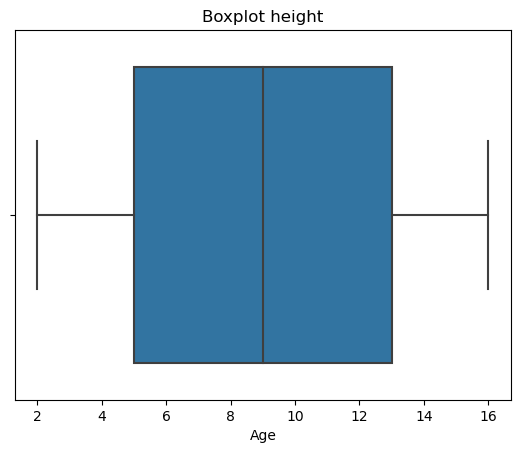

Text(0.5, 1.0, 'Boxplot height')

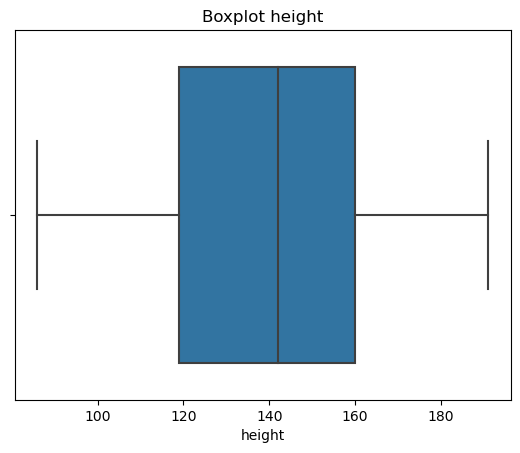

In [17]:
unique_subjects = healthy_df.drop_duplicates(subset=["SubjectNr"], keep='first')

sns.boxplot(data=unique_subjects, x=unique_subjects["Age"])
plt.title("Healthy kids age")
plt.show()

sns.boxplot(data=unique_subjects, x=unique_subjects["height"])
plt.title("Healthy kids height")
plt.show()

sns.boxplot(data=unique_subjects, x=unique_subjects["weight"])
plt.title("Healthy kids weight")
plt.show()

sns.boxplot(data=unique_subjects, x=unique_subjects["BMI_SDS"])
plt.title("Healthy kids BMI")
plt.show()

<AxesSubplot:xlabel='ethnicity', ylabel='Count'>

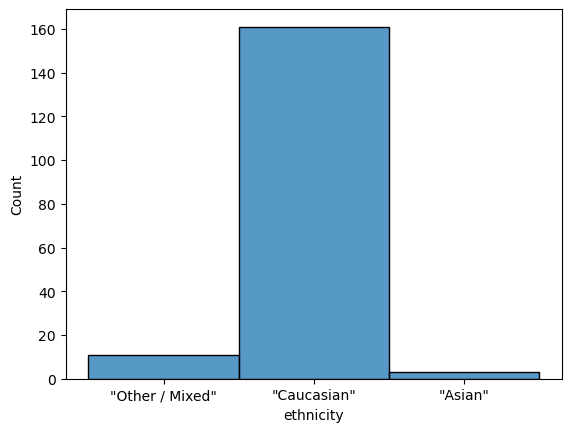

In [19]:
sns.histplot(data=unique_subjects, x="ethnicity")